## Algoritmo LSTM

In [2]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from collections import Counter
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,roc_auc_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical
from collections import Counter

In [3]:
nombre_csv = 1
de = pd.read_csv(f'Datos_train/{nombre_csv}_t.csv')
dp = pd.read_csv(f'Datos_test/{nombre_csv}_p.csv')

# Procesamiento

In [3]:
# Contamos las ocurrencias de cada nivel de estrés en la nueva columna
conteo_nivel_estresde = de['Nivel_estres'].value_counts()
conteo_nivel_estresdp = dp['Nivel_estres'].value_counts()
# Mostramos el resultado
print(conteo_nivel_estresde)
print(conteo_nivel_estresdp)

Nivel_estres
normal     2320
alerta      248
peligro      72
Name: count, dtype: int64
Nivel_estres
normal     1080
alerta      162
peligro      54
Name: count, dtype: int64


In [4]:
# Crear un diccionario para mapear cada categoría única en la columna 'nivel_estres' a un número
mapping = {'normal': 0, 'alerta': 1, 'peligro': 2}
# Mapear las categorías a números utilizando el método map de pandas
de['Nivel_estres'] = de['Nivel_estres'].map(mapping)
dp['Nivel_estres'] = dp['Nivel_estres'].map(mapping)

# ALGORITMO DE LSTM

In [5]:
# Separar características y etiquetas del conjunto de entrenamiento
X_train = de[['period eating','period other','period resting','period rumination','activity_level']]
y_train = de['Nivel_estres']
# Separar características y etiquetas del conjunto de prueba
X_test = dp[['period eating','period other','period resting','period rumination','activity_level']]
y_test = dp['Nivel_estres']

In [6]:
# Estandarizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Convertir etiquetas a formato categórico
y_train_categorical = to_categorical(y_train, num_classes=3)
y_test_categorical = to_categorical(y_test, num_classes=3)

In [7]:
# Reshape de datos para LSTM (samples, timesteps, features)
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))


In [8]:
# Construir el modelo LSTM
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, X_train_scaled.shape[1])))
model.add(Dense(3, activation='softmax'))
# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


C:\Users\PC\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
# Entrenar el modelo
model.fit(X_train_reshaped, y_train_categorical, epochs=50, batch_size=32, validation_data=(X_test_reshaped, y_test_categorical))


Epoch 1/50


83/83 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - accuracy: 0.8858 - loss: 0.9584 - val_accuracy: 0.8333 - val_loss: 0.7061
Epoch 2/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8788 - loss: 0.5846 - val_accuracy: 0.8333 - val_loss: 0.6121
Epoch 3/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8878 - loss: 0.4777 - val_accuracy: 0.8333 - val_loss: 0.5997
Epoch 4/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8807 - loss: 0.4717 - val_accuracy: 0.8333 - val_loss: 0.5899
Epoch 5/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8768 - loss: 0.4636 - val_accuracy: 0.8333 - val_loss: 0.5837
Epoch 6/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8896 - loss: 0.4298 - val_accuracy: 0.8333 - val_loss: 0.5780
Epoch 7/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8742 - loss: 0.4771 - val_accuracy: 0.8333 - val_loss: 0.5758
Epoch 8/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8778 - loss: 0.4546 - val_accuracy: 0.8333 - val_loss: 0

In [10]:
# Predecir las etiquetas para el conjunto de prueba
y_pred_proba = model.predict(X_test_reshaped)
y_pred = np.argmax(y_pred_proba, axis=1)

41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


In [11]:
# Contamos las ocurrencias de cada nivel de estrés
valores_unicos, conteos = np.unique(y_test, return_counts=True)
valores_unicos1, conteos1 = np.unique(y_pred, return_counts=True)
# Combina los valores únicos y sus conteos en un diccionario para facilitar la visualización
ocurrencias = dict(zip(valores_unicos, conteos))
ocurrenciaspre = dict(zip(valores_unicos1, conteos1))
# Mostramos el resultado
#print(conteo_nivel_estres)
print(ocurrencias)
print(ocurrenciaspre)

{0: 1080, 1: 162, 2: 54}
{0: 1295, 2: 1}


# EVALUACION DEL ALGORITMO

In [12]:
# EVALUACION DEL MODELO
from sklearn.preprocessing import label_binarize

# Calcular las métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])

# Calcular el AUC
roc_auc = roc_auc_score(y_test_binarized, y_pred_proba, multi_class='ovo')

# Mostrar métricas
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC:", roc_auc)

Accuracy: 0.8325617283950617
Precision: 0.6943371943371943
Recall: 0.8325617283950617
F1 Score: 0.7571929824561404
ROC AUC: 0.5586728100209752


c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


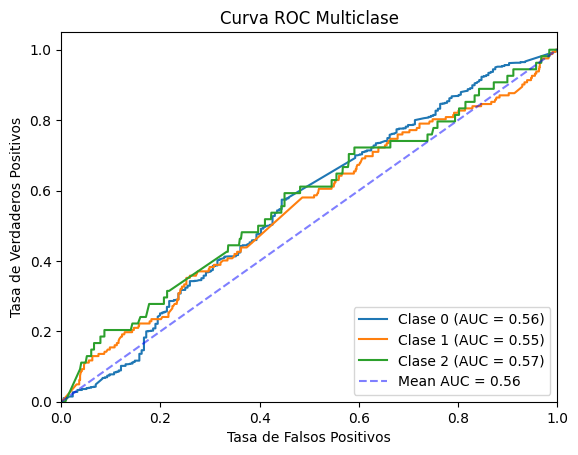

In [14]:
fpr = {}
tpr = {}
roc_auc = {}

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar las curvas ROC
plt.figure()
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Clase {i} (AUC = {roc_auc[i]:.2f})')

# Extraer los valores
values = roc_auc.values()
# Calcular la media
mean_auc = sum(values) / len(values)

plt.plot([0, 1], [0, 1], 'b--', label=f"Mean AUC = {mean_auc:.2f}", alpha=0.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC Multiclase')
plt.legend(loc='lower right')
#plt.savefig(f'../Curva_Roc/{nombre_csv}_roc_LSTM.png', format='png', dpi=300)
plt.show()